<a href="https://colab.research.google.com/github/michalszczecinski/data-driven-notebooks/blob/master/electronics/electrical_technology_project_circuit_led1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Disclaimer

* Content of this notebook is for my personal learning. 
* I currently use a repository of Python notebooks as my knowledge management system, it is like some people use note taking apps with the added benefit of interactivity and ability to programatically play with the concepts, ideas and data in order to deepen the understanding and strengthen recall.  
* Any opinions or ideas expressed here are on my own behalf and do not represent my employer.
* Note: This notebook is created from the template `knowledge_notebook_template.ipynb`. For convenience it inherits all potentially useful imports, helper utils and general structure. That means it is likely not using all the defined functionality.
* Content starts from the section [Header](#cell-header).


## Code Set Up

In [ ]:
#@title Imports {display-mode: "form"}
import sys
import os
import platform
import random
import itertools
import math
import datetime

import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# reading google sheets files
import gspread
from oauth2client.client import GoogleCredentials

from collections import OrderedDict

# print versions
print (f"system: {sys.version}")
print (f"pandas: {pd.__version__}")
print (f"numpy: {np.__version__}")

system: 3.7.11 (default, Jul  3 2021, 18:01:19) 
[GCC 7.5.0]
pandas: 1.1.5
numpy: 1.19.5


In [ ]:
# @title Dislay settings  {display-mode: "form"} 
sns.set(context='notebook', style="whitegrid", rc={"figure.figsize": (20, 10)})
pd.set_option("display.float_format", '{:.3f}'.format)
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)
pd.set_option("max_colwidth", 200)

### Helper functions and snippets

Note: This notebook is created from the template `knowledge_notebook_template.ipynb`. For convenience it inherits all potentially useful imports, helper utils and general structure. That means it is likely not using all the defined functionality.

In [ ]:
# @title Using R  {display-mode: "form"} 
# loading in case want to write R code
%load_ext rpy2.ipython
# example R code

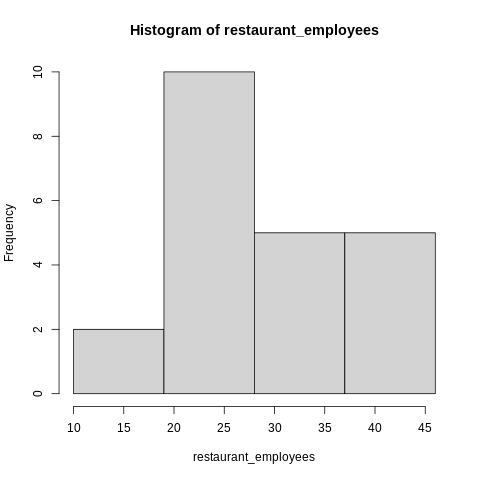

In [ ]:
%%R
restaurant_employees <- c(22, 35, 15, 26, 40, 28, 18, 20, 25, 34, 39, 42, 24, 22, 19, 27, 22, 34, 40, 20, 38, 28)
hist(restaurant_employees, breaks=c(10,19,28,37,46), right=FALSE)

#### Loading data from gsheet

In [ ]:
# @title Google Authentication {display-mode: "form"}
# from google.colab import auth
# auth.authenticate_user()

In [ ]:
# @title {display-mode: "form"} 
# importing data from google sheet
def get_data_gsheet(name='data_jobs_summary'):
  gc = gspread.authorize(GoogleCredentials.get_application_default())
  worksheet = gc.open(name).sheet1
  # get_all_values gives a list of rows.
  rows = worksheet.get_all_values()
  header = rows[0]
  df_data = pd.DataFrame.from_records(data=rows[1:], columns=header)
  return df_data

# df = get_data_gsheet()

In [ ]:
# @title {display-mode: "form"} 
def generate_header(author='unknown', title='unknown', description ='unknown', prepared_for='unknown', tags=''):
    """
    desc: generates standard header with meta information describing report
    input: author, title, description, prepared_for, tags
    output: rendering formatted dataframe with report details
    """
    meta_dict = OrderedDict()

    # properties to fill
    meta_dict['author'] = author
    meta_dict['title'] = title
    meta_dict['description'] = description
    meta_dict['prepared_for'] = prepared_for
    meta_dict['tags'] = str(tags)

    # auto generated
    runtime = datetime.datetime
    meta_dict['runtime'] = runtime.now().strftime("%Y-%m-%d %H:%M:%S")
    path = os.getcwd()
    meta_dict['path'] = path
    python_version = platform.python_version()
    meta_dict['python_version'] = python_version
    meta_dict['pandas_version'] = pd.__version__

    df_meta= pd.DataFrame(meta_dict, index=['meta_information']).T
    return df_meta

#### Plotting for math

In [ ]:
# @title {display-mode: "form"} 
def create_spine_plane(ax, title='title'):
  """
  adds cartesian plane 
  to the background of the plot
  """
  ax.set_title(title)
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_color('none')
  ax.spines['bottom'].set_position('zero')
  ax.spines['top'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')
  return ax

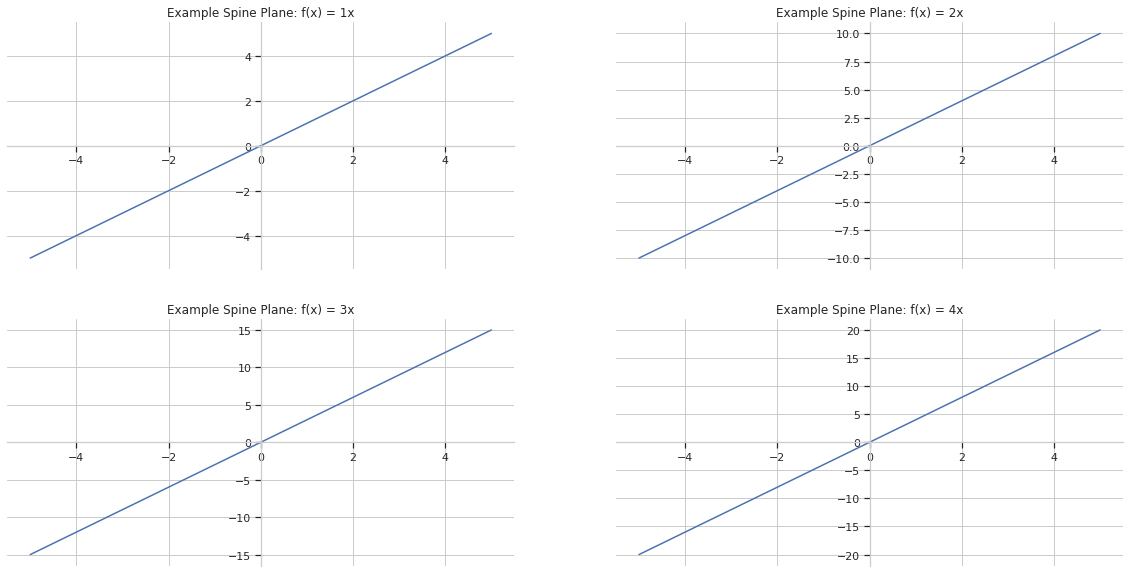

In [ ]:
# @title {display-mode: "form"} 
# showing demo function on a plane
fig = plt.figure()

# define grid here
subplot_grid_x = 2
subplot_grid_y = 2

x = [x for x in np.arange(-5,6)]

for i in range(4):
  # function definition
  y = [(i+1) * xi for xi in x]
  ax = fig.add_subplot(subplot_grid_x, subplot_grid_y, i+1)
  ax = create_spine_plane(ax, title=f"Example Spine Plane: f(x) = {i+1}x");
  ax.plot(x, y);

In [ ]:
# @title {display-mode: "form"} 
def plot_shapes():
  """
  plot example shapes - circle and lines
  """
  plt.axes()
  circle = plt.Circle((0,0),1, facecolor='None',edgecolor='blue')
  plt.gca().add_patch(circle)
  line1 = plt.Line2D((0, 1), (0, 0), linewidth=1.5, linestyle='--', color = 'black')
  line2 = plt.Line2D((0, 1), (0, 0), linewidth=1.5, linestyle='--', color = 'black')

  plt.gca().add_line(line1)
  plt.axis('scaled')
  return plt


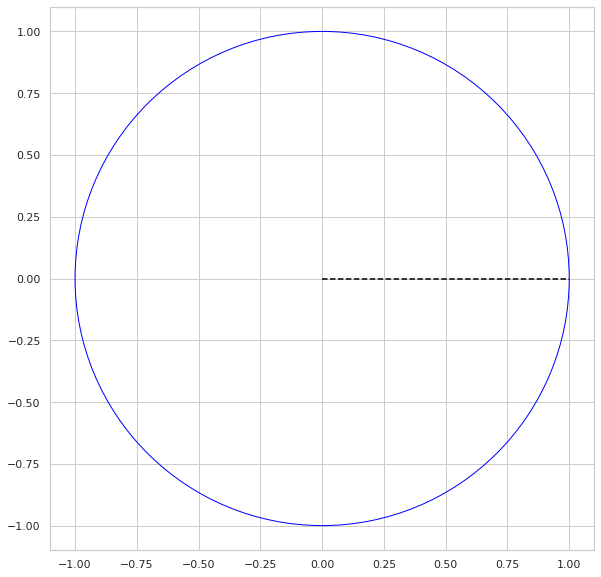

In [ ]:
plot_shapes();

### Handy Links

[Altair guide](https://altair-viz.github.io/getting_started/overview.html#)

<a name="cell-header"></a>
# Header: Title and metadata

In [ ]:
# setting up header info
author = 'Michal Szczecinski'
prepared_for ='purpose'
title = 'Title'
description = 'Description'
tags = ['#principles', '#data-driven', '#datascience', '#leadership']
generate_header(author=author, title=title, description=description, prepared_for=prepared_for, tags=tags)

,meta_information
author,Michal Szczecinski
title,Title
description,Description
prepared_for,purpose
tags,"['#principles', '#data-driven', '#datascience', '#leadership']"
runtime,2021-07-25 14:59:49
path,/content
python_version,3.7.11
pandas_version,1.1.5


In [ ]:
#TODO: add pictures from the project (presentation)

## Context

### [Design](https://www.circuitlab.com/editor/#?id=ge6qcma2m8kd)

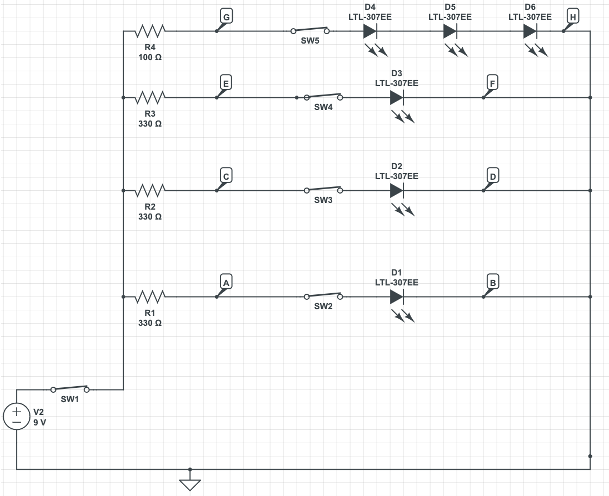

### Prototype

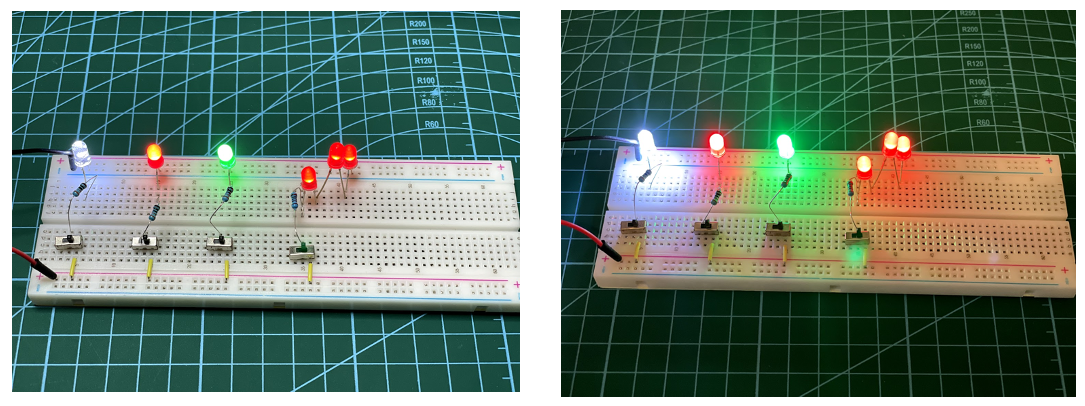

### Model

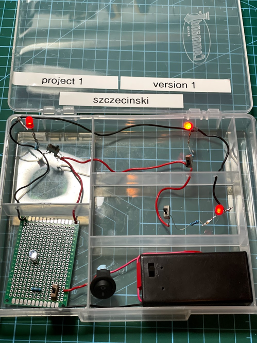

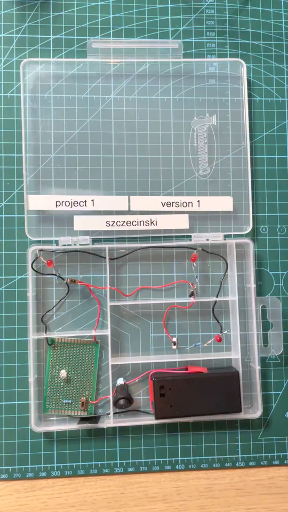

## Configuration

### Specs

In [ ]:
supply_voltage = 9

In [ ]:
battery_capacity = 500 ma 

In [ ]:
d ={'red': 2.0,
    'orange': 2.2,
    'yellow':2.2,
    'blue': 3.2,
    'green': 3.2,
    'white': 4}

In [ ]:
df_led_specs = pd.DataFrame.from_dict(d, orient='index')
df_led_specs = df_led_specs.reset_index()
df_led_specs.columns = ['led_color', 'forward_voltage_20mA']
df_led_specs

,led_color,forward_voltage_20mA
0,red,2.000
1,orange,2.200
2,yellow,2.200
3,blue,3.200
4,green,3.200
5,white,4.000


In [ ]:
resistors = {'room1':100,
         'room2':330,
         'room3':330,
         'room4':100}

df_resistor = pd.DataFrame.from_dict(resistors, orient='index')

df_resistor.columns = ['resistor']
df_resistor

,resistor
room1,100
room2,330
room3,330
room4,100


In [ ]:
voltage_drops = {'room1':4,
         'room2':2,
         'room3':2,
         'room4':2}

df_voltage_drops = pd.DataFrame.from_dict(voltage_drops, orient='index')

df_voltage_drops.columns = ['voltage_drops']
df_voltage_drops


,voltage_drops
room1,4
room2,2
room3,2
room4,2


In [ ]:
df_all = df_resistor.join(df_voltage_drops)
df_all

,resistor,voltage_drops
room1,100,4
room2,330,2
room3,330,2
room4,100,2


In [ ]:
df_all['current'] = (supply_voltage - df_all['voltage_drops'])/df_all['resistor']

In [ ]:
df_all

,resistor,voltage_drops,current
room1,100,4,0.050
room2,330,2,0.021
room3,330,2,0.021
room4,100,2,0.070


In [ ]:
all_current = df_all['current'].sum()
all_current

0.16242424242424242

In [ ]:
resistance_total = (df_all['resistor'].apply(lambda x: (1/x)).sum())**(-1)
resistance_total

38.372093023255815

## References

[Presentation](https://docs.google.com/presentation/d/1W3zcUMqziqqZwBQVxLKtSh73XabQ5gjNjo4j8SPMLXM/edit#slide=id.p4) - There should be video but it only works in pptx